In [1]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step


In [2]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

# Re-loads the VGG16 model without the top or FC layers
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in model.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [15]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(1024, activation = "relu")(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [16]:
model.input

<tf.Tensor 'input_2:0' shape=(None, 224, 224, 3) dtype=float32>

In [17]:
model.layers

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 2

FC_Head = addTopModel(model, num_classes)

modelnew = Model(inputs=model.input, outputs=FC_Head)

print(modelnew.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [1]:
from zipfile import ZipFile
file_name = "Faces.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/Faces/Train/'
validation_data_dir = '/content/Faces/Validation/'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batchsize,
        class_mode='categorical')

Found 220 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [27]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("ravi_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 160
nb_validation_samples = 60
epochs = 10
batch_size = 4
history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)


Epoch 1/10
40/40 [==============================] - 18s 448ms/step - loss: 0.7120 - accuracy: 0.7221 - val_loss: 0.1829 - val_accuracy: 0.9513

Epoch 00001: val_loss improved from inf to 0.18288, saving model to ravi_vgg.h5
Epoch 2/10
40/40 [==============================] - 18s 440ms/step - loss: 0.4846 - accuracy: 0.8214 - val_loss: 0.1752 - val_accuracy: 0.9688

Epoch 00002: val_loss improved from 0.18288 to 0.17515, saving model to ravi_vgg.h5
Epoch 3/10
40/40 [==============================] - 17s 436ms/step - loss: 0.3920 - accuracy: 0.8658 - val_loss: 0.1189 - val_accuracy: 0.9823

Epoch 00003: val_loss improved from 0.17515 to 0.11889, saving model to ravi_vgg.h5
Epoch 4/10
40/40 [==============================] - 16s 395ms/step - loss: 0.2819 - accuracy: 0.8849 - val_loss: 0.0962 - val_accuracy: 0.9688

Epoch 00004: val_loss improved from 0.11889 to 0.09617, saving model to ravi_vgg.h5
Epoch 5/10
40/40 [==============================] - 18s 438ms/step - loss: 0.2757 - accuracy

In [28]:
from keras.models import load_model

classifier = load_model('ravi_vgg.h5')

Class - Amit Shah


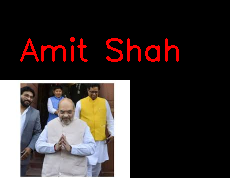

Class - Narendra Modi


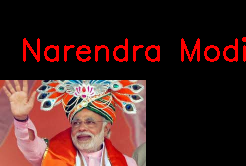

Class - Amit Shah


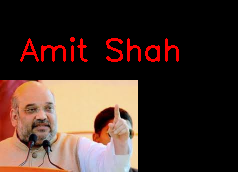

Class - Amit Shah


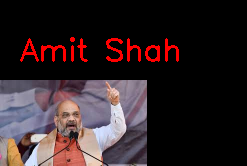

Class - Amit Shah


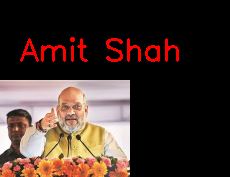

Class - Narendra Modi


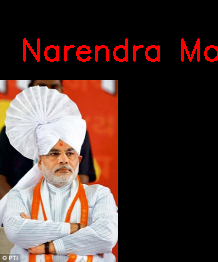

Class - Amit Shah


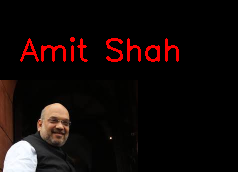

Class - Narendra Modi


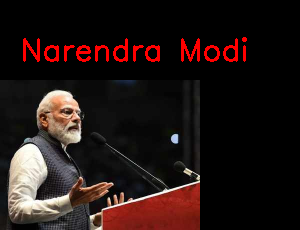

Class - Amit Shah


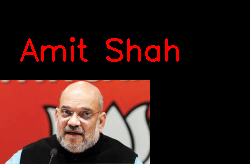

In [31]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
from os import listdir
from os.path import isfile, join

my_dict = {"[0]":"Amit Shah", 
          "[1]": "Narendra Modi"}

my_dict_n = {"HM": "Amit Shah",
            "PM": "Narendra Modi"}

def draw_test(name, pred, im):
    home = my_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, home, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow( expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + my_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,9):
    input_im = getRandomImage("/content/Faces/Validation/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(modelnew.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()